**Name:** Weng Yuqian

**EID:** 55972965

# CS5489 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)

Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### 1. Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [6]:
### INSERT YOUR CODE HERE

In [7]:
cntvect = feature_extraction.text.CountVectorizer(stop_words='english')
trainX = cntvect.fit_transform(newsgroups_train.data)
trainY = newsgroups_train.target
testX = cntvect.transform(newsgroups_test.data)
testY = newsgroups_test.target

### 2. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [8]:
### INSERT YOUR CODE HERE

In [9]:
bmodel = naive_bayes.BernoulliNB(alpha=0.01)
bmodel.fit(trainX,trainY)
predictY = bmodel.predict(testX)
accuracy = metrics.accuracy_score(testY,predictY)
print("predictions: ", predictY)
print("actual:      ", testY)
print(accuracy)

predictions:  [1 1 1 ... 2 1 1]
actual:       [2 1 1 ... 3 1 1]
0.7220990391722099


What are the most informative words for each category?  Run the below code.

Note: `model.coef_[i]` will index the scores for the i-th class

In [10]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.coef_[i][t]))

class alt.atheism
    time      (-1.80425)
    know      (-1.60938)
    does      (-1.60938)
    god       (-1.58876)
    like      (-1.54876)
    say       (-1.52934)
    just      (-1.45524)
    think     (-1.39462)
    people    (-1.29855)
    don       (-1.19015)
class comp.graphics
    just      (-1.95097)
    don       (-1.91547)
    program   (-1.88119)
    need      (-1.85897)
    does      (-1.74486)
    use       (-1.73511)
    like      (-1.60768)
    know      (-1.51005)
    graphics  (-1.49466)
    thanks    (-1.47202)
class sci.space
    earth     (-1.90778)
    use       (-1.88531)
    time      (-1.77001)
    know      (-1.73117)
    think     (-1.73117)
    nasa      (-1.73117)
    don       (-1.69379)
    just      (-1.47250)
    like      (-1.41535)
    space     (-1.01921)
class talk.religion.misc
    say       (-1.65549)
    way       (-1.62810)
    like      (-1.61468)
    does      (-1.53773)
    know      (-1.48953)
    think     (-1.42133)
    god       (-1.378

### 3. Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [11]:
### INSERT YOUR CODE HERE

In [12]:
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
trainXtf = tf_trans.fit_transform(trainX)
testXtf = tf_trans.transform(testX)
print(trainXtf[0])

  (0, 25319)	0.011612590842194593
  (0, 23828)	0.04411276764268745
  (0, 22878)	0.021768538796905663
  (0, 21208)	0.021021837944747244
  (0, 21204)	0.035635543768408835
  (0, 21084)	0.012123414534667993
  (0, 21025)	0.028499807128693832
  (0, 20977)	0.017637927259367588
  (0, 20973)	0.01852918155009838
  (0, 20513)	0.028499807128693832
  (0, 20239)	0.027041696610641455
  (0, 19841)	0.012398663598700512
  (0, 19066)	0.08112508983192436
  (0, 18949)	0.02600715073404497
  (0, 18704)	0.0200439254121256
  (0, 18701)	0.027041696610641455
  (0, 18699)	0.016093158499424356
  (0, 18440)	0.022056383821343725
  (0, 17464)	0.04353707759381133
  (0, 16965)	0.021021837944747244
  (0, 16089)	0.01730316078430437
  (0, 15322)	0.020598273303291344
  (0, 15301)	0.020803823134210423
  (0, 14706)	0.00911173343368544
  (0, 14154)	0.009305256823661344
  (0, 13023)	0.02720100420955099
  (0, 12052)	0.015189395872537715
  (0, 11203)	0.013687160346666343
  (0, 10605)	0.032658111417828414
  (0, 10286)	0.087246891

In [13]:
mmodel_tf = naive_bayes.MultinomialNB(alpha=0.01)
mmodel_tf.fit(trainXtf, trainY)
tf_predictY = mmodel_tf.predict(testXtf)
print("predictions: ", tf_predictY)
print("actual:      ", testY)
print(accuracy)

predictions:  [2 1 1 ... 2 1 1]
actual:       [2 1 1 ... 3 1 1]
0.7220990391722099


What are the most informative features for Multinomial model? Run the below code.

In [14]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.coef_[i][t]))

class alt.atheism
    religion  (-6.27527)
    objective (-6.22645)
    does      (-6.18746)
    say       (-6.09804)
    think     (-5.98203)
    people    (-5.96589)
    don       (-5.87817)
    deletion  (-5.73142)
    god       (-5.65913)
    just      (-5.63866)
class comp.graphics
    program   (-6.08537)
    hi        (-6.08070)
    does      (-6.02576)
    image     (-5.98895)
    looking   (-5.98739)
    know      (-5.91146)
    file      (-5.85131)
    files     (-5.85033)
    graphics  (-5.44781)
    thanks    (-5.42243)
class sci.space
    real      (-6.55010)
    launch    (-6.47681)
    moon      (-6.45843)
    think     (-6.45771)
    orbit     (-6.40969)
    thanks    (-6.37048)
    just      (-6.26170)
    like      (-6.16102)
    nasa      (-6.14133)
    space     (-5.35748)
class talk.religion.misc
    think     (-6.41554)
    just      (-6.41541)
    wrong     (-6.41521)
    don       (-6.39721)
    objective (-6.38006)
    people    (-6.30357)
    christian (-6.244

How do the most informative words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**

Finally, look at a few of the misclassified documents. 

In [15]:
### INSERT YOUR CODE HERE ###

In [16]:
inds = where(predictY != testY)
print(inds)
for i in inds[0]:
    print("---- true={}, predic={}".format(testY[i], predictY[i]))
    print(newsgroups_test.data[i])

(array([   0,    6,   17,   22,   30,   34,   37,   41,   42,   47,   52,
         62,   66,   67,   74,   76,   77,   82,   86,   90,   97,  105,
        106,  110,  111,  119,  122,  123,  126,  129,  131,  132,  134,
        136,  144,  145,  149,  150,  151,  160,  162,  166,  169,  173,
        177,  179,  181,  182,  184,  191,  194,  198,  204,  205,  207,
        208,  209,  211,  214,  215,  218,  220,  223,  227,  234,  238,
        240,  245,  246,  247,  250,  254,  255,  257,  264,  268,  280,
        281,  282,  283,  284,  285,  286,  287,  289,  291,  306,  307,
        311,  312,  321,  330,  333,  334,  336,  337,  340,  350,  355,
        357,  359,  361,  362,  364,  367,  368,  371,  373,  374,  377,
        383,  384,  388,  389,  399,  402,  407,  415,  419,  425,  428,
        432,  440,  443,  447,  448,  450,  451,  453,  455,  457,  461,
        463,  465,  470,  471,  473,  480,  483,  485,  487,  492,  495,
        499,  502,  503,  509,  512,  514,  522,  

---- true=3, predic=0


The problem is that you imagine him inside this huge wall, unable
to see reality. While he imagines the same about you. Clearly we
have a case where relativity plays a big role concerning looking
at opposite frames of reality.

Cheers,
Kent
---- true=1, predic=2
: Has anyone else experienced anything like this?  If this just means that I
: need to replace the screen then I guess I'll have to but I thought that the
: "death" of my LCD screen would be a little less dramatic when it eventually
: happened.  I didn't want to take it in to be repaired before I asked on the
: net about this because I already know what they'll say: "Yep, you gotta have
: this replaced and it's gonna cost you $???."

: I've only had the computer for about 21 months.

"Only"?!?  That's a long time! (echoing above posting)  The way the market
is going nowadays, your machine's obsolete two weeks before you buy it. 
Sounds like you'll have to sink *some* money into it for repair, but
that's 

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**

### 4. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [17]:
### INSERT YOUR CODE HERE

best alpha= 0.0003511191734215131 , best accuracy= 0.7812269031781227


Text(0, 0.5, 'accuracy')

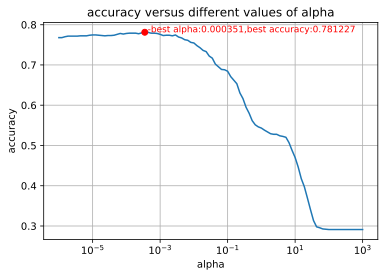

In [18]:
alphas = logspace(-6,3,100)
accuracies = []

tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
trainXtf = tf_trans.fit_transform(trainX)
testXtf = tf_trans.transform(testX)

for al in alphas:
    mmodel_tf = naive_bayes.MultinomialNB(alpha=al)
    mmodel_tf.fit(trainXtf, trainY)
    tf_predictY = mmodel_tf.predict(testXtf)
    accuracy = metrics.accuracy_score(testY, tf_predictY)
    accuracies.append(accuracy)

n_bestalpha = argmax(accuracies)
bestalpha = alphas[n_bestalpha]
bestaccuracy = accuracies[n_bestalpha]
print("best alpha=", bestalpha, ", best accuracy=", bestaccuracy)

plt.figure()
plt.title('accuracy versus different values of alpha')
plt.grid(True) 
plt.semilogx(alphas, accuracies)
plt.plot(bestalpha, bestaccuracy, 'ro')
plt.text(bestalpha, bestaccuracy,' -best alpha:%f,best accuracy:%f'%(bestalpha,bestaccuracy),fontdict={'size': 9, 'color':  'red'})
plt.xlabel('alpha') 
plt.ylabel('accuracy')     

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [19]:
### INSERT YOUR CODE HERE

best maxf= 19609.368421052633 , best acc= 0.7753141167775314


Text(0, 0.5, 'accuracy')

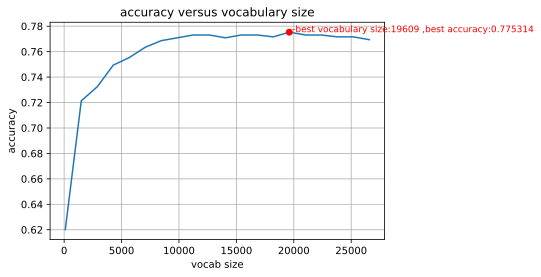

In [20]:
maxfeatures = linspace(100,26577,20)
accuracies = []

for mf in maxfeatures:
    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=int(mf))
    trainX = cntvect.fit_transform(newsgroups_train.data)
    trainY = newsgroups_train.target
    testX = cntvect.transform(newsgroups_test.data)
    testY = newsgroups_test.target
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    trainXtf = tf_trans.fit_transform(trainX)
    testXtf = tf_trans.transform(testX)
    mmodel_tf = naive_bayes.MultinomialNB(alpha=0.00351)
    mmodel_tf.fit(trainXtf, trainY)
    tf_predictY = mmodel_tf.predict(testXtf)
    accuracy = metrics.accuracy_score(testY, tf_predictY)
    accuracies.append(accuracy)

n_bestmf = argmax(accuracies)
bestmf  = maxfeatures[n_bestmf]
bestaccuracy = accuracies[n_bestmf]
print("best maxf=", bestmf, ", best acc=", bestaccuracy)

plt.figure
plt.title('accuracy versus vocabulary size')
plt.grid(True)
plt.plot(maxfeatures, accuracies)
plt.plot(bestmf, bestaccuracy, 'ro')
plt.text(bestmf, bestaccuracy,' -best vocabulary size:%.f ,best accuracy:%f'%(bestmf,bestaccuracy),fontdict={'size': 9, 'color':  'red'})
plt.xlabel('vocab size')
plt.ylabel('accuracy')     